In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import multiprocess
import concurrent.futures
from datetime import timedelta
import simulate

In [25]:
spx = pd.read_csv('^GSPC.csv', index_col=0)
start = dt.date(2020, 1, 1)
end = dt.date(2080, 12, 31)
Market = simulate.Market(spx.iloc[-7500:, -2], start, end)

In [26]:
our_data = spx.iloc[-7500:, :]
our_data.index = pd.to_datetime(our_data.index)
in_years = our_data['Adj Close'].asfreq('BYS', 'pad')
#plt.plot(in_years.pct_change())
#print(in_years.pct_change().mean())

In [31]:
def draw():
    market = Market.garch(log=False, mu_override = 0.030800266141550736).asfreq('BYS', 'pad')
    geo_mean = (market['Price'][-1]/market['Price'][0])**(1/len(market['Price']))-1
    means.append(geo_mean)


In [32]:
means = []
processes = []
for _ in range(60):
    p=multiprocess.Process(target=draw())
    p.start()
    processes.append(p)
for process in processes:
    process.join()

process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started
process started


In [33]:
mean_ret=pd.DataFrame(means,columns=["Returns"])
actual = our_data['Adj Close'].pct_change().mean()
geo_mean = (in_years[-1]/in_years[0])**(1/len(in_years))-1
print(geo_mean)
print(mean_ret.mean())


0.07601121293459889
Returns    0.063707
dtype: float64


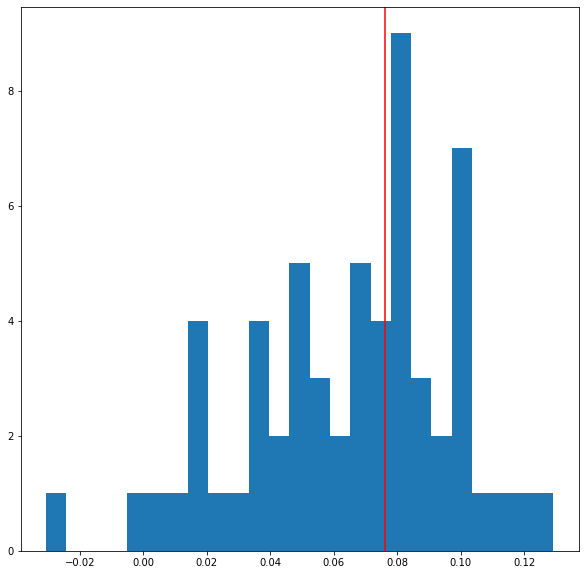

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(x=means,bins=25)
ax.axvline(x=geo_mean, color='r')
